# Principal Component Analysis (PCA)

PCA finds the directions in your data where the points are most spread out (maximum variance), allowing you to summarize high-dimensional data using just a few key axes of variation.


# Graphical Summary

![Fig](./graphical_summary/slides/Slide31.png)

# Key Formula

Let $\mathbf{X}$ be an $N \times p$ data matrix ($N$ observations, $p$ variables). The singular value decomposition (SVD) of $\mathbf{X}$ can be written as

$$
\mathbf{X} = \mathbf{FL} + \mathbf{E} = \mathbf{U}_k\mathbf{\Sigma_k}\mathbf{W}_k^T + \mathbf{E}
$$

where:
- $\mathbf{F}=\mathbf{U}\mathbf{\Sigma_k}$ can be considered as the factor matrix 
  - $\mathbf{U}_k$: $N \times N$, each column is the left singular vector of $\mathbf{X}$ (first $k$ vectors)
  - $\mathbf{\Sigma}_k$: $N \times k$, the top $k$ rows forms a diagonal matrix where each element is the singular value of $\mathbf{X}$, ordered from largest to smallest. The bottom $(N-k) \times k$ are all 0.
- $\mathbf{L}=\mathbf{W}_k^T$ as the loading matrix, as in the context of factor analysis.
  - $\mathbf{W}_k^T$: $k \times p$, $\mathbf{W}_k$ consists of the first $k$ columns of $\mathbf{W}$, each column of which is the right singular vector of $\mathbf{X}$.
- $\mathbf{E}$: $N \times p$ **reconstruction error** (truncation error). 
  - If all singular values are used (i.e., $k=p$), then $\mathbf{E}=0$.


# Technical Details

## PCA and Factor Analysis

PCA can be considered as a special case of factor analysis with the following constraints:

1. $\mathbf{U}_k$ and $\mathbf{W}_k$ are both orthogonal matrix
2. Each column of $\mathbf{U}_k$ is a unit vector of length $N$, the left singular vector of $\mathbf{X}$
3. The diagonal elements ($\sigma_1, \dots, \sigma_k$) of the top part of $\mathbf{\Sigma}_k$ is the singular values of $\mathbf{X}$, and $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_k > 0$
4. Each column of $\mathbf{W}_k$ is a unit vector of length $p$, the right singular vector of $\mathbf{X}$

When conducting PCA, we order the singular values by the variance $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_k > 0$ to reach the **variance maximization** by selecting the **first** $k$ singular vectors. 

## Connection to $\mathbf{X}^T\mathbf{X}$

### Eigendecomposition of $\mathbf{X}^T\mathbf{X}$

When we take $k=p$ we have $\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{W}^T $, then

$$
\mathbf{X}^T\mathbf{X} = (\mathbf{W}\mathbf{\Sigma}\mathbf{U}^T)(\mathbf{U}\mathbf{\Sigma}\mathbf{W}^T) = \mathbf{W}\mathbf{\Sigma}^T\mathbf{\Sigma}\mathbf{W}^T = \mathbf{W}\mathbf{\Lambda}\mathbf{W}^T
$$

(here we denote $\mathbf{\Lambda} = \mathbf{\Sigma}^T\mathbf{\Sigma}$). 

This is the eigendecomposition of matrix $\mathbf{X}^T\mathbf{X}$. $\mathbf{\Lambda}$ is a $p\times p$ diagonal matrix of eigenvalues $\lambda_k$ of $\mathbf{X}^T\mathbf{X}$. $\lambda_k$ is equal to the sum of the squares over the dataset associated with each component $k$.

The eigenvalues $\lambda_k$ relate to the singular values by $\lambda_k = \sigma_k^2$, where $\sigma_k$ are the diagonal elements of $\mathbf{\Sigma}$, i.e., the singular value of $\mathbf{X}$.

### Connection to Covariance Matrix

When $\mathbf{X}$ is centered (columns have zero mean), $\mathbf{X}^T\mathbf{X}/(N-1)$ is the sample covariance matrix $\text{Cov}(\mathbf{X})$. Thus, PCA via eigendecomposition is often described as finding the eigenvectors of the covariance matrix. The eigenvectors $\mathbf{W}$ are the principal directions, and the eigenvalues represent the variance explained along each direction.

In practice the SVD of $\mathbf{X}$ is preferred for numerical stability (especially when $p$ is large or when $\mathbf{X}^T\mathbf{X}$ is nearly singular), but the eigendecomposition of $\mathbf{X}^T\mathbf{X}$ is the traditional textbook approach.

## Scaling

PCA is sensitive to the scaling of the variables. Mathematically this sensitivity comes from the way a rescaling changes the sample‑covariance matrix that PCA diagonalises. So in practice one needs to scale (both centered and unit variance) the matrix before performing PCA.

## Variance Explained

The variance explained by the first $k$ PCs is:

$$
\frac{\sum_{j=1}^k \sigma_j^2}{\sum_{j=1}^p \sigma_j^2}
$$

# Related Topics

- [Confounders](https://statfungen.github.io/statgen-prerequisites/confounder.html)
- [Genetic Relationship Matrix](https://statfungen.github.io/statgen-prerequisites/genetic_relationship_matrix.html)
- [Proportion of Variance Explained](https://statfungen.github.io/statgen-prerequisites/proportion_of_variance_explained.html)
- [Factor Analysis](https://statfungen.github.io/statgen-prerequisites/factor_analysis.html)

# Example


## Detect Multiple Ancestral Populations via PCA

You are given a sample of genotyped individuals and want to know: **Are all individuals in this sample from the same genetic ancestry, or do they come from different populations?** This is a fundamental question in population genetics and forensics, as population structure can be a major confounder in association studies.

In this example, we'll demonstrate how PCA can automatically reveal population structure without any prior knowledge of population labels.

This is the **mixture problem**: we have a mixture of individuals from distinct populations, and PCA reveals their structure through the principal components. Here we use the same setting as in the topic of [Factor Analysis](https://statfungen.github.io/statgen-prerequisites/factor_analysis.html), and we will see the PCA will detect the four groups of individuals easily.

## Generate Data

This is the same generation as we did in the [Factor Analysis](https://statfungen.github.io/statgen-prerequisites/factor_analysis.html).

In [34]:
rm(list=ls())
set.seed(74)

N <- 50  # Number of individuals
p <- 100  # Number of markers (SNPs)
k <- 2   # Number of ancestral populations

# Create L matrix with very distinct population frequencies
L_true <- matrix(0, nrow = k, ncol = p)
# Population 1
L_true[1, 1:50] <- runif(50, 0.9, 0.95)
L_true[1, 51:100] <- runif(50, 0.05, 0.1)
# Population 2
L_true[2, 1:50] <- runif(50, 0.05, 0.3)
L_true[2, 51:100] <- runif(50, 0.8, 0.95)
colnames(L_true) <- paste0("SNP", 1:p)
rownames(L_true) <- paste0("POP", 1:k)

# Create F matrix with specified ancestry proportions
F_true <- matrix(0, nrow = N, ncol = k)
# Individuals 1-15: Pure Pop1
F_true[1:15, 1] <- 1.0
F_true[1:15, 2] <- 0.0
# Individuals 16-30: Pure Pop2
F_true[16:30, 1] <- 0.0
F_true[16:30, 2] <- 1.0
# Individuals 31-40: Pop1-Pop2 admixture (80-20)
F_true[31:40, 1] <- 0.8
F_true[31:40, 2] <- 0.2
# Individuals 41-50: Pop1-Pop2 admixture (30-70)
F_true[41:50, 1] <- 0.3
F_true[41:50, 2] <- 0.7
rownames(F_true) <- paste0("IND", 1:N)
colnames(F_true) <- paste0("POP", 1:k)

# Generate genotype matrix X_raw
X_raw <- matrix(0, nrow = N, ncol = p)
for (i in 1:N) {
  for (j in 1:p) {
    # Expected frequency = weighted average of population frequencies
    p_ij <- sum(F_true[i, ] * L_true[ , j])
    
    # Sample genotype (0, 1, or 2 copies)
    X_raw[i,j] <- rbinom(1, size = 2, prob = p_ij)
  }
}
rownames(X_raw) <- paste0("IND", 1:N)
colnames(X_raw) <- paste0("SNP", 1:p)

As described above, we need to scale the `X_raw` first before performing PCA:

In [35]:
X <- scale(X_raw, center = TRUE, scale = TRUE)

## Perform PCA on the Genotype Matrix

Now we apply PCA to the genotype matrix $\mathbf{X}$ to discover the population structure.

In [36]:
pca_result <- prcomp(X, center = FALSE, scale. = FALSE)

## Proportion of Variance Explained by the top PCs

The scree plot shows that the first principal component captures the majority of variance, indicating strong population differentiation.

In [37]:
# Extract principal component scores
pc_scores <- pca_result$x

# Calculate variance explained by each PC
variance_explained <- (pca_result$sdev^2) / sum(pca_result$sdev^2) * 100

cat("Variance explained by top 5 PCs:\n")
for (i in 1:5) {
  cat(sprintf("PC%d: %.2f%%\n", i, variance_explained[i]))
}
cat("\n")

Variance explained by top 5 PCs:
PC1: 60.92%
PC2: 2.60%
PC3: 2.33%
PC4: 2.20%
PC5: 1.99%



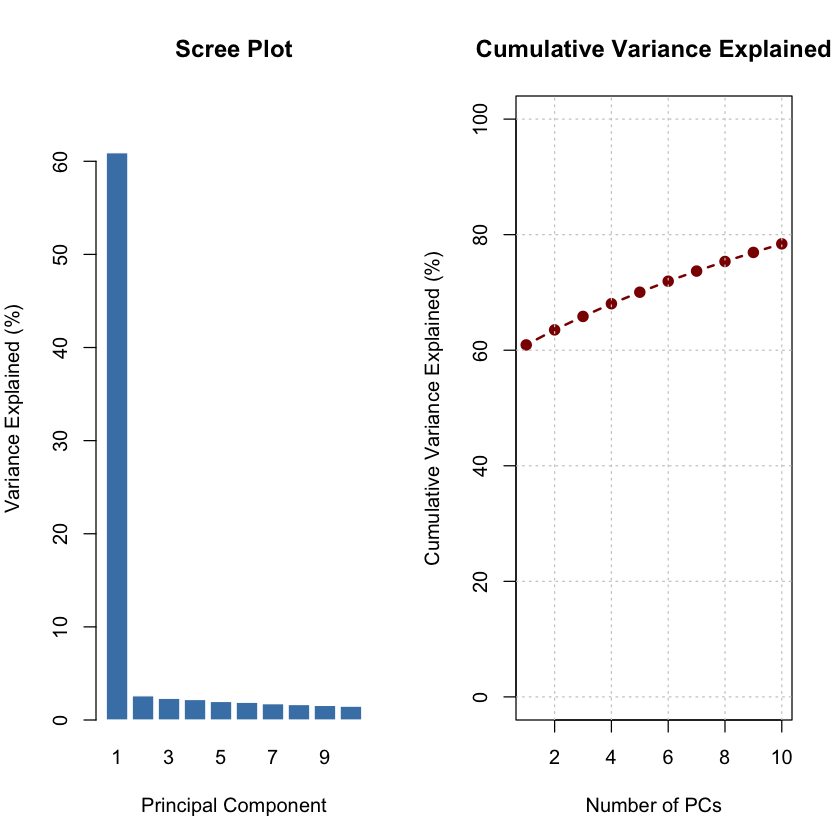

In [38]:
# Create scree plot
par(mfrow = c(1, 2), mar = c(5, 4, 4, 2))

# Barplot of variance explained
barplot(variance_explained[1:10],
        names.arg = 1:10,
        xlab = "Principal Component",
        ylab = "Variance Explained (%)",
        main = "Scree Plot",
        col = "steelblue",
        border = "white",
        ylim = c(0, max(variance_explained[1:10]) * 1.1))

# Cumulative variance explained
cumvar <- cumsum(variance_explained[1:10])
plot(1:10, cumvar,
     type = "b",
     pch = 19,
     col = "darkred",
     lwd = 2,
     xlab = "Number of PCs",
     ylab = "Cumulative Variance Explained (%)",
     main = "Cumulative Variance Explained",
     ylim = c(0, 100))
grid(col = "gray80")

## PC1 vs PC2 Colored by Population

We plot the first two principal components, coloring individuals by their true population origin (which PCA discovers automatically!).

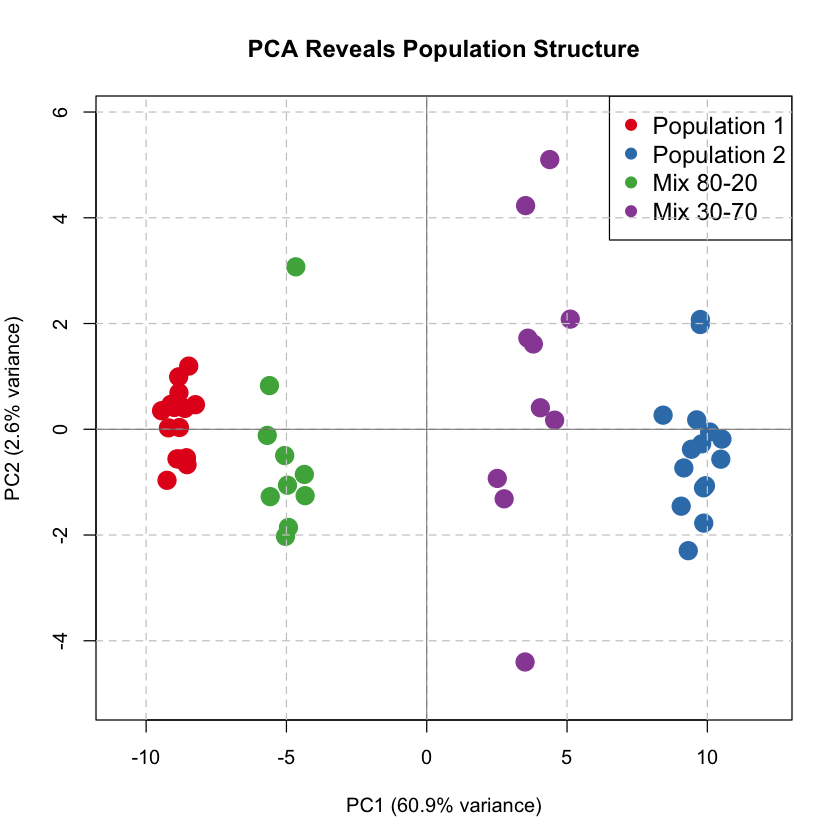

In [39]:
# Define colors for populations
pop_labels <- c(rep("Population 1", 15), rep("Population 2", 15), rep("Mix 80-20", 10), rep("Mix 30-70", 10))
pop_colors <- c("Population 1" = "#E41A1C", "Population 2" = "#377EB8", "Mix 80-20" = "#4DAF4A", "Mix 30-70" = "#984EA3")

# Create scatter plot: PC1 vs PC2
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2))

plot(pc_scores[, 1], pc_scores[, 2],
     col = pop_colors[pop_labels],
     pch = 19, cex = 2,
     xlab = sprintf("PC1 (%.1f%% variance)", variance_explained[1]),
     ylab = sprintf("PC2 (%.1f%% variance)", variance_explained[2]),
     main = "PCA Reveals Population Structure",
     xlim = range(pc_scores[, 1]) * 1.15,
     ylim = range(pc_scores[, 2]) * 1.15)

legend("topright", 
       legend = names(pop_colors),
       col = pop_colors, 
       pch = 19, 
       cex = 1.2,
       bty = "o")

grid(col = "gray80", lty = 2)
abline(h = 0, col = "gray50", lty = 1, lwd = 0.8)
abline(v = 0, col = "gray50", lty = 1, lwd = 0.8)

## From mixture to admixture

Note that here PCA actually captures four clusters of individuals, treating them as separate groups in the PC plot. 

But our data generation is actually an **admixture problem**, i.e., the individuals actually comes from only two ancestries, with mixed between the ancestries. Since PCA is actually a specific type of factor analysis, we can also infer the proportion of ancestries in each individuals from the PCA results.

Now we can attempt to infer the genetic ancestry using the PCA results. It's a heuristic that works well when:
- Population structure is the dominant source of variation (PC1 explains most variance)
- Populations are reasonably well-separated

The $k$-th PC score for the $i$-th individual is actually calculated by mapping the $i$-th individual in $\mathbf{X}$ through the coeffecients $\mathbf{W}_k$:

$$
\text{PC score}_{i,k} = \sum_{j=1}^p \mathbf{X}_{i,j} \cdot \mathbf{W}_{j,k}
$$

To illustrate this as the proportion of ancestry, the PC scores will be scaled to [0,1].

In [40]:
# Find the range of PC1 scores
pc1_min <- min(pc_scores[, 1])
pc1_max <- max(pc_scores[, 1])

# Estimate ancestry proportions by rescaling PC1 to [0, 1]
# This assumes: Pop1 is at pc1_min, Pop2 is at pc1_max
# Ancestry proportion for Pop2 = (PC1_score - pc1_min) / (pc1_max - pc1_min)
ancestry_pop1_pca <- (pc_scores[, 1] - pc1_min) / (pc1_max - pc1_min)
ancestry_pop2_pca <- 1 - ancestry_pop1_pca

# Create a matrix similar to the ADMIXTURE F matrix
F_pca <- t(rbind(ancestry_pop1_pca, ancestry_pop2_pca))
colnames(F_pca) <- c("POP1", "POP2")
rownames(F_pca) <- rownames(X)

# Calculate correlation between true and PCA-inferred ancestry
cor_pop1 <- cor(F_true[ , 1], F_pca[ , "POP1"])
cor_pop2 <- cor(F_true[ , 2], F_pca[ , "POP2"])

cat("Correlation between true and PCA-inferred ancestry proportions:\n")
cat(sprintf("Population 1: %.4f\n", cor_pop1))
cat(sprintf("Population 2: %.4f\n", cor_pop2))
cat("\n")

Correlation between true and PCA-inferred ancestry proportions:
Population 1: -0.9976


Population 2: -0.9976



Since the correlations are all close to -1, we need to flip the populations.

In [41]:
F_pca_flipped <- F_pca[, c("POP2", "POP1")]

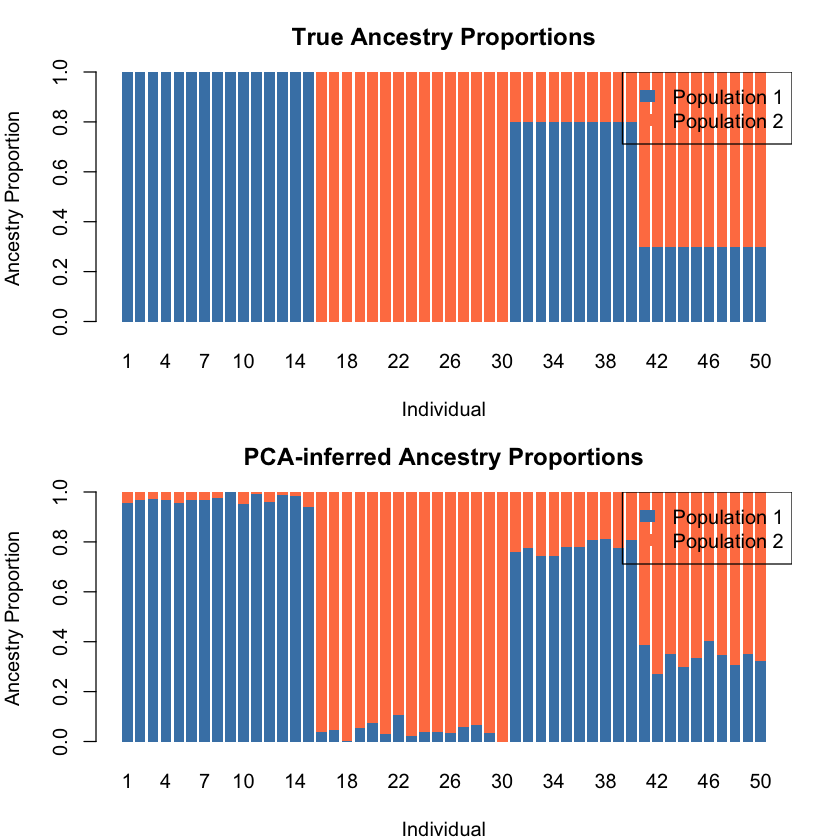

In [42]:
# Visualize the comparison using same style as ADMIXTURE
par(mfrow = c(2, 1), mar = c(4, 4, 3, 2))

# True ancestry
barplot(t(F_true), col = c("steelblue", "coral"), border = NA,
        main = "True Ancestry Proportions",
        xlab = "Individual", ylab = "Ancestry Proportion",
        names.arg = 1:N)
legend("topright", legend = c("Population 1", "Population 2"),
       fill = c("steelblue", "coral"), border = NA)

# PCA-inferred ancestry
barplot(t(F_pca_flipped), col = c("steelblue", "coral"), border = NA,
        main = "PCA-inferred Ancestry Proportions",
        xlab = "Individual", ylab = "Ancestry Proportion",
        names.arg = 1:N)
legend("topright", legend = c("Population 1", "Population 2"),
       fill = c("steelblue", "coral"), border = NA)

While PCA can visualize population structure, **for admixture analysis it is better to use the ADMIXTURE model** introduced in [Factor Analysis](https://statfungen.github.io/statgen-prerequisites/factor_analysis.html). Here's why:

- **PCA is a descriptive method**: PCA finds the directions of maximum variance in the data but does not provide a statistical model of how the data was generated. 
- **ADMIXTURE is a generative model**: ADMIXTURE explicitly models the genetic mixture as a weighted combination of ancestry components: $\mathbf{X} = \mathbf{FL} + \mathbf{E}$ (check [Factor Analysis](https://statfungen.github.io/statgen-prerequisites/factor_analysis.html) for more details).

## Interpretation of Loadings for the top PC

Here we show that actually the loading for PC1 actually captures the difference of the allele frequencies between the two ancestries:

In [49]:
# Extract PC loadings (weights for each SNP)
pc1_loadings <- pca_result$rotation[, 1]
pc2_loadings <- pca_result$rotation[, 2]

# Calculate allele frequency for each population at each SNP
pop1_freq <- colMeans(X_raw[1:15, ]) / 2   # Pure Population 1
pop2_freq <- colMeans(X_raw[16:30, ]) / 2  # Pure Population 2

# Calculate allele frequency difference between populations
freq_diff <- pop2_freq - pop1_freq

# Show correlations
cor_pc1_freqdiff <- cor(pc1_loadings, freq_diff)

cat("\n=== PC Loadings and Allele Frequency Differences in the Raw Data ===\n")
cat(sprintf("Correlation between PC1 loadings and freq differences (raw data): %.4f\n", cor_pc1_freqdiff))
cat("\n")



=== PC Loadings and Allele Frequency Differences in the Raw Data ===
Correlation between PC1 loadings and freq differences (raw data): 0.9975



And this correlation persists before and after the scale of input data:

In [50]:
# Calculate allele frequency for each population at each SNP
pop1_freq_scaled <- colMeans(X[1:15, ]) / 2   # Pure Population 1
pop2_freq_scaled <- colMeans(X[16:30, ]) / 2  # Pure Population 2

# Calculate allele frequency difference between populations
freq_diff_scaled <- pop2_freq_scaled - pop1_freq_scaled

# Show correlations
cor_pc1_freqdiff_scaled <- cor(pc1_loadings, freq_diff_scaled)

cat("\n=== PC Loadings and Allele Frequency Differences After Scaling the Data ===\n")
cat(sprintf("Correlation between PC1 loadings and freq differences (scaled data): %.4f\n", cor_pc1_freqdiff_scaled))
cat("\n")



=== PC Loadings and Allele Frequency Differences After Scaling the Data ===


Correlation between PC1 loadings and freq differences (scaled data): 0.9985



# Supplementary

## Graphical Summary

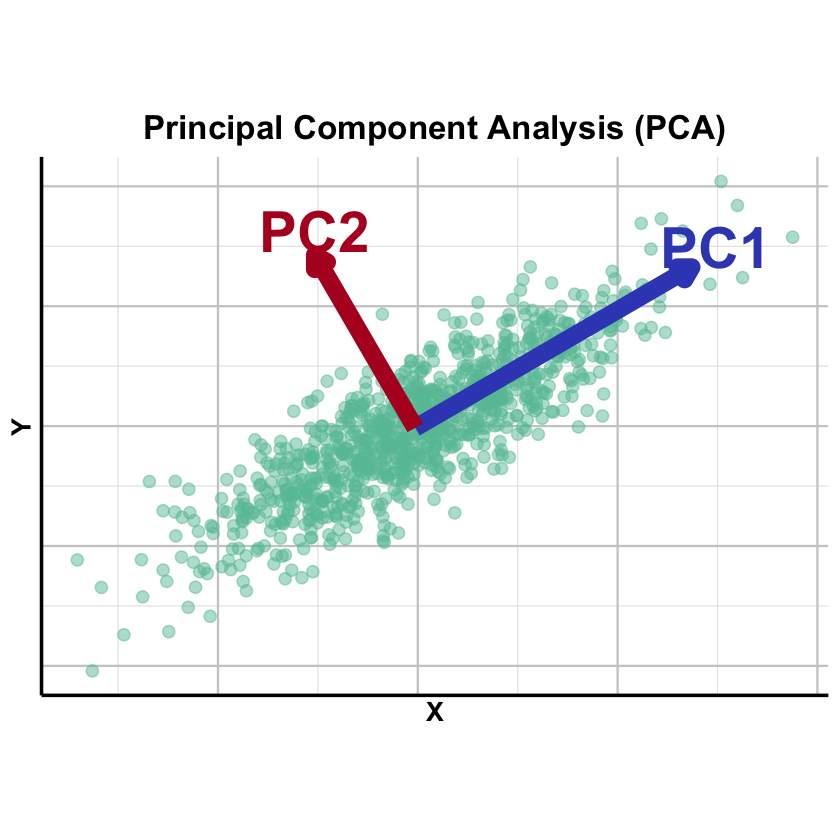

In [ ]:
library(ggplot2)

# Set seed for reproducibility
set.seed(42)

# Generate correlated 2D data with PC1 >> PC2
n <- 1000
theta <- pi/6  # 30 degree tilt

# Create elongated cloud - PC1 much longer than PC2
x <- rnorm(n, 0, 3)    # Large variance for PC1 direction
y <- rnorm(n, 0, 0.8)  # Small variance for PC2 direction

# Rotate to create diagonal spread
X_original <- x * cos(theta) - y * sin(theta)
Y_original <- x * sin(theta) + y * cos(theta)

data <- data.frame(X = X_original, Y = Y_original)

# Perform PCA
pca <- prcomp(data, center = TRUE, scale. = FALSE)

# Get PC directions - flip if needed
pc1_direction <- -pca$rotation[, 1]  
pc2_direction <- -pca$rotation[, 2]  

# Scale for visualization
scale_factor1 <- 8
scale_factor2 <- 5
pc1_end <- scale_factor1 * pc1_direction
pc2_end <- scale_factor2 * pc2_direction

# Get the center (mean)
center_x <- mean(X_original)
center_y <- mean(Y_original)

# Create the plot
p_PCA <- ggplot(data, aes(x = X, y = Y)) +
  geom_point(color = "#66C2A5", alpha = 0.5, size = 3) +
  
  # PC1 arrow (blue) - use annotate instead of geom_segment
  annotate("segment", 
           x = center_x, y = center_y, 
           xend = center_x + pc1_end[1], 
           yend = center_y + pc1_end[2],
           arrow = arrow(length = unit(0.3, "cm"), type = "closed"),
           color = "#3B4CC0", linewidth = 5) +
  annotate("text", x = center_x + pc1_end[1] + 0.6, 
           y = center_y + pc1_end[2] + 0.5, 
           label = "PC1", color = "#3B4CC0", size = 12, fontface = "bold") +
  
  # PC2 arrow (purple) - use annotate instead of geom_segment
  annotate("segment", 
           x = center_x, y = center_y, 
           xend = center_x + pc2_end[1], 
           yend = center_y + pc2_end[2],
           arrow = arrow(length = unit(0.3, "cm"), type = "closed"),
           color = "#B40426", linewidth = 5) +
  annotate("text", x = center_x + pc2_end[1], 
           y = center_y + pc2_end[2] + 0.6, 
           label = "PC2", color = "#B40426", size = 12, fontface = "bold") +
  
  # Styling
  labs(title = "Principal Component Analysis (PCA)",
       x = "X", y = "Y") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text = element_blank(),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    axis.line = element_line(color = "black", linewidth = 1),
    plot.background = element_rect(fill = "transparent", color = NA),
    panel.background = element_rect(fill = "transparent", color = NA)
  ) +
  coord_fixed(ratio = 1)
  
# Save with transparent background
ggsave("./cartoons/PCA.png", plot = p_PCA, width = 18, height = 12, 
       units = "in", dpi = 300, bg = "transparent")

print(p_PCA)

# Extended Reading

- [An Owner's Guide to the Human Genome: an introduction to human population genetics, variation and disease](https://web.stanford.edu/group/pritchardlab/HGbook.html), by Jonathan Pritchard, Stanford University (Chapter 3.1 and 3.2)
- Novembre, J., Johnson, T., Bryc, K. et al. Genes mirror geography within Europe. Nature 456, 98–101 (2008). https://doi.org/10.1038/nature07331
- Novembre, J., Stephens, M. Interpreting principal component analyses of spatial population genetic variation. Nat Genet 40, 646–649 (2008). https://doi.org/10.1038/ng.139
- Patterson, Nick, Alkes L. Price, and David Reich. "Population structure and eigenanalysis." PLoS genetics 2.12 (2006): e190. https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.0020190

